### Driven Data Pump it Up Challenge:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

In [2]:
#Reading the df files and assigning them to variables - we have 2 csv files
training_label = pd.read_csv('data/training set labels.csv')
training_values_df = pd.read_csv('data/training set values.csv')

In [3]:
# Merge training_values_df and training_label dfs to have one df
train_df = pd.merge(training_values_df, training_label, on = "id")

In [4]:
# Deleting training_label df
del training_label

In [5]:
# Creating a copy of train df so making changes would not alter the initial dataset
df = train_df.copy()

In [6]:
df.shape

(59400, 41)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [8]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [9]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [10]:
#df[['funder','installer']].dropna().head(10)

In [11]:
df.status_group.count()

59400

In [12]:
# The count of each fuctional type of the pumps in status_group so that we will understand the functional scenario 
# of the pump status
df.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [13]:
functional_percent = (sum(df['status_group'] == 'functional') / df.status_group.count()) * 100
non_functional_percent = (sum(df['status_group'] == 'non functional') / df.status_group.count()) * 100
repair_percent = (sum(df['status_group'] == 'functional needs repair') / df.status_group.count()) * 100
print('Functional Pumps are: ' + str(round(functional_percent, 2)) + '%')
print('Non Functional Pumps are: ' + str(round(non_functional_percent, 2)) + '%')
print('Functional but Needs Repair Pumps are: ' + str(round(repair_percent, 2)) + '%')

Functional Pumps are: 54.31%
Non Functional Pumps are: 38.42%
Functional but Needs Repair Pumps are: 7.27%


In [14]:
df['status_group'].value_counts(normalize=True)

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64

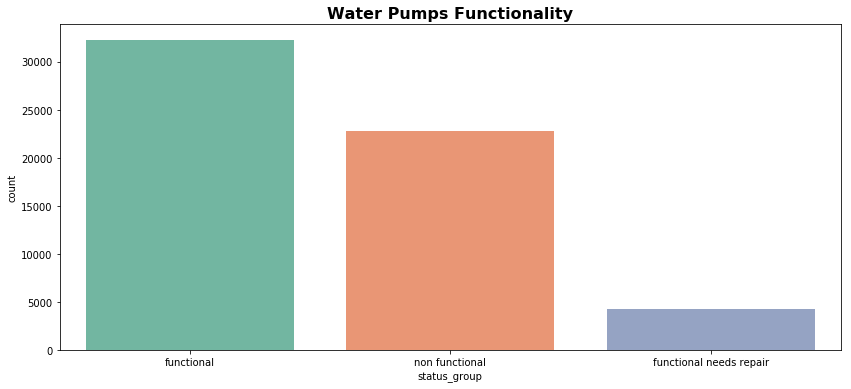

In [15]:
plt.figure(figsize=(14,6))
plt.title("Water Pumps Functionality",fontsize=16, fontweight='bold')
sns.countplot(x=df['status_group'], data=df, palette="Set2");

#### By the above figures, we can roughly estimate that there is 54.31% chance that if we take a random pump in the data to be a functional one.

In [16]:
num_feature_names = [
     'amount_tsh',
     'gps_height',
    'longitude',
    'latitude',
     'population',
    'construction_year'
]

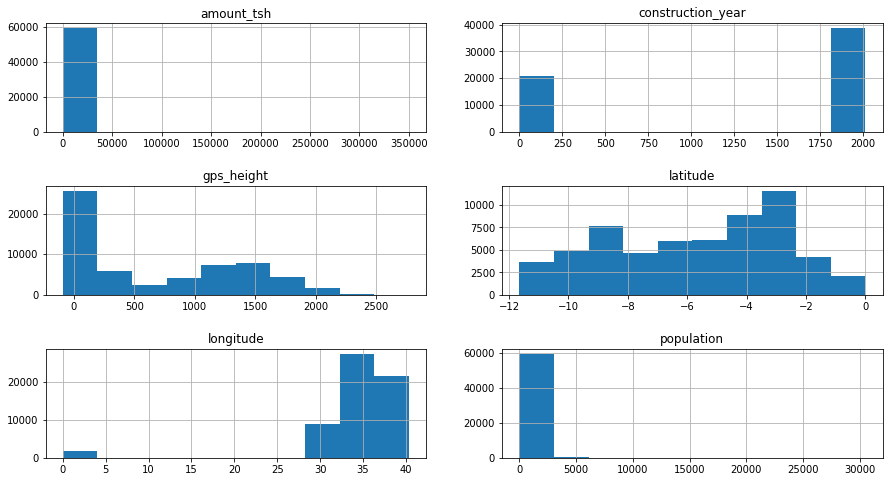

In [17]:
df.loc[:,num_feature_names].hist()
fig = plt.gcf()
fig.set_size_inches(15,8)
fig.subplots_adjust(wspace=0.2, hspace=0.5)

In [18]:
df.groupby(['status_group','construction_year']).size()

status_group    construction_year
functional      0                    10555
                1960                    24
                1961                     2
                1962                     7
                1963                    31
                1964                     7
                1965                    11
                1966                     6
                1967                    31
                1968                    22
                1969                    15
                1970                    99
                1971                    82
                1972                   178
                1973                    55
                1974                   234
                1975                   144
                1976                    85
                1977                    62
                1978                   426
                1979                    41
                1980                   258
                1981

In [19]:
plt.figure(figsize=(30, 20))
sns.countplot(data=df,y='age',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

ValueError: Could not interpret input 'age'

<Figure size 2160x1440 with 0 Axes>

In [ ]:
plt.bar(x='age', height=)

In [ ]:
df.age.max()

In [ ]:
#df.groupby([['quantity']], index=df['quantity'])#, columns=df['status_group'], aggfunc='count')

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='basin',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
df[['quantity']].groupby(df['extraction_type']).size()

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='quantity',hue='extraction_type')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
df[df['quantity']=='dry'].groupby(df['extraction_type']).size()

In [ ]:
df.columns

In [ ]:
piv_df = df[['quantity', 'status_group', 'basin']]
piv_table = piv_df.pivot_table(index='quantity', columns='status_group', aggfunc='count')
piv_table

In [ ]:
piv_df= df[['water_quality','status_group','basin']]
piv_table = piv_df.pivot_table(index='water_quality',columns='status_group', aggfunc='count')
piv_table

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)

In [ ]:
_ = plt.boxplot(df['gps_height'])

In [ ]:
_ = plt.boxplot(df['amount_tsh'])

### Dropping The Features With Similar Representation of Data

In [ ]:
# checking the amount_tsh column to see how many rows have 0's in them
len(df[df['amount_tsh'] == 0])

In [ ]:
df[df['gps_height'] == 0]

In [ ]:
df[df['gps_height'] == 0].groupby('status_group').size()

In [ ]:
#plt.figure()
#plt.subplot(111, projection="aitoff")
#plt.title("Aitoff")
#plt.grid(True)

In [ ]:
# checking the population column to see how many rows have 0's in them
len(df[df['longitude'] == 0])

In [ ]:
# We can see that there are 41639 0's in amount_tsh column. Since these 0's might cause some 
#issues later, we need to change them to NaN values and then replace the NaN values 
#with transform("mean") and transform("median") - This is also true for population and gps_height
df.population.min()
df['amount_tsh'].replace(0.0, np.nan, inplace=True)
df['gps_height'].replace(0.0, np.nan, inplace=True)
df['population'].replace(0.0, np.nan, inplace=True)

In [ ]:
# checking to make sure all 0's have been changed to Null values
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df["gps_height"].fillna(df.groupby(['region', 'district_code'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df.groupby(['region'])["gps_height"].transform("mean"), inplace=True)
df["gps_height"].fillna(df["gps_height"].mean(), inplace=True)
df["population"].fillna(df.groupby(['region', 'district_code'])["population"].transform("median"), inplace=True)
df["population"].fillna(df.groupby(['region'])["population"].transform("median"), inplace=True)
df["population"].fillna(df["population"].median(), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region', 'district_code'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df.groupby(['region'])["amount_tsh"].transform("median"), inplace=True)
df["amount_tsh"].fillna(df["amount_tsh"].median(), inplace=True)

In [ ]:
# checking to make sure all Null values have been filled
df.isnull().sum()

In [ ]:
df.groupby(['region','permit']).size()

In [ ]:
features=['amount_tsh', 'gps_height', 'population']
scaler = MinMaxScaler(feature_range=(0,20))
df[features] = scaler.fit_transform(df[features])
df[features].head(20)

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df,x='water_quality',hue='status_group')
plt.legend(bbox_to_anchor=(1, 1), loc=2)
df.water_quality.value_counts()

In [ ]:
#looking at regions
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='region',hue='status_group')

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='public_meeting',hue='status_group')

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='source_type',hue='status_group')

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='extraction_type_group',hue='status_group')

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='extraction_type_class',hue='status_group')

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='waterpoint_type',hue='status_group')

In [ ]:
plt.figure(figsize=(24, 9))

sns.countplot(data=df,x='quantity',hue='status_group')

In [ ]:
df[df['quantity']=='dry'].groupby(df['status_group']).size()

In [ ]:
len(df[df['longitude'] == 0])

In [ ]:
len(df[df['latitude'] == 0])

In [ ]:
len(df[df['construction_year'] == 0])

In [ ]:
df['longitude'].replace(0.0, np.nan, inplace=True)
df['latitude'].replace(0.0, np.nan, inplace=True)
df['construction_year'].replace(0.0, np.nan, inplace=True)

In [ ]:
df.groupby(['district_code', 'region','construction_year']).size()

In [ ]:
df["latitude"].fillna(df.groupby(['region', 'district_code'])["latitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region', 'district_code'])["longitude"].transform("mean"), inplace=True)
df["longitude"].fillna(df.groupby(['region'])["longitude"].transform("mean"), inplace=True)
df["construction_year"].fillna(df.groupby(['region', 'district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['region'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df.groupby(['district_code'])["construction_year"].transform("median"), inplace=True)
df["construction_year"].fillna(df["construction_year"].median(), inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
#if water point is old, it is highly likely to be non functional or needs repair.
#New features were created namely number of days and number of months water point is operational.
print(df.date_recorded.head(5))
print(df.construction_year.head(5))

In [ ]:
df['date_recorded'] = pd.to_datetime(df['date_recorded'])
df.date_recorded.head(5)
print(df.date_recorded.dt.year.head(5))
print(df.construction_year.head(5))
df['age'] = 2020 - df.construction_year
df.operational_year.head(5)

In [ ]:
df[df['age']<0]

In [ ]:
sns.FacetGrid(df, hue='status_group',height=14).map(sns.kdeplot, 'age', shade=True).add_legend()

In [ ]:
plt.figure(figsize=(24, 9))
sns.countplot(data=df,x='payment_type',hue='status_group')

In [ ]:
# region and region_code are representing the same thing
garbage_features = ['wpt_name','num_private','subvillage','region_code','recorded_by']
df.drop(garbage_features,axis=1,inplace=True)

In [ ]:
df.groupby(['management', 'management_group']).size()

In [ ]:
df.drop('management_group',axis=1,inplace=True)

In [ ]:
df.groupby(['extraction_type_group','extraction_type_class','extraction_type']).size()

In [ ]:
df.drop(['extraction_type_group', 'extraction_type_class'],axis=1,inplace=True)

In [ ]:
df.groupby(['scheme_management', 'scheme_name']).size()

In [ ]:
df.drop('scheme_name',axis=1,inplace=True)

In [ ]:
df.groupby(['payment', 'payment_type']).size()

In [ ]:
df.drop('payment',axis=1,inplace=True)

In [ ]:
df.groupby(['water_quality', 'quality_group']).size()

In [ ]:
df.drop('quality_group',axis=1,inplace=True)

In [ ]:
df.groupby(['quantity', 'quantity_group']).size()

In [ ]:
df.drop('quantity_group',axis=1,inplace=True)

In [ ]:
df.groupby(['source', 'source_type', 'source_class']).size()

In [ ]:
df.drop('source_type',axis=1,inplace=True)

In [ ]:
df.groupby(['waterpoint_type', 'waterpoint_type_group']).size()

In [ ]:
df.drop('waterpoint_type_group',axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
df.groupby(['lga', 'ward','status_group']).size()

In [ ]:
df.drop('ward',axis=1,inplace=True)

In [ ]:
df.groupby(['installer', 'funder','status_group']).size()

In [ ]:
df.drop('installer',axis=1,inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.drop('public_meeting', axis=1, inplace=True)
df.drop('permit', axis=1, inplace=True)

In [ ]:
#For every categorical response, convert the levels to lower case, in case there is random capitalization

df.waterpoint_type = df.waterpoint_type.str.lower()
df.funder = df.funder.str.lower()
df.basin = df.basin.str.lower()
df.region = df.region.str.lower()
df.source = df.source.str.lower()
df.lga = df.lga.str.lower()
df.management = df.management.str.lower()
df.quantity = df.quantity.str.lower()
df.water_quality = df.water_quality.str.lower()
df.payment_type=df.payment_type.str.lower()
df.extraction_type=df.extraction_type.str.lower()

In [ ]:
df["funder"].fillna("other", inplace=True)
df["scheme_management"].fillna("other", inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df.drop(['date_recorded','construction_year'], axis=1, inplace=True)

In [ ]:
df.isnull().sum()

In [ ]:
df[['funder']]